Install Libraries

Load Data

In [2]:
from scipy.io import arff
import pandas as pd

# Load the ARFF data
data = arff.loadarff('diabetes.arff')  # Replace with the correct path to the ARFF file
df = pd.DataFrame(data[0])

# Decode byte strings if necessary (depends on the format of your 'class' column)
df['Outcome'] = df['Outcome'].apply(lambda x: x.decode('utf-8'))

# Display the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


In [3]:
import sklearn
from sklearn.feature_selection import f_classif

# Separate the target column (assumed to be 'class') from the features
features = df.drop(columns=['Outcome'])
target = df['Outcome']

f_scores= sklearn.feature_selection.f_classif(features, target.values.ravel()) #Calculating the F scores
feature_score = {col_name: value for col_name, value in zip(features, f_scores[0])} #Creating a dictionary with each feature as a key and its F score as its value
feature_score


{'Pregnancies': np.float64(39.670227393616116),
 'Glucose': np.float64(213.16175217803828),
 'BloodPressure': np.float64(3.256950397889028),
 'SkinThickness': np.float64(4.304380905008516),
 'Insulin': np.float64(13.281107531096337),
 'BMI': np.float64(71.7720721022405),
 'DiabetesPedigreeFunction': np.float64(23.871300204344593),
 'Age': np.float64(46.140611238735865)}

In [4]:
# Identifying the input variable with the highest and lowest discriminative power

max_var, max_value = max(feature_score.items(), key=lambda x: x[1])
min_var, min_value = min(feature_score.items(), key=lambda x: x[1])

print("Input Variable with the highest discriminative power:", max_var, "| ANOVA F-score:", max_value)
print("Input Variable with the lowest discriminative power:", min_var, "| ANOVA F-score:", min_value)

Input Variable with the highest discriminative power: Glucose | ANOVA F-score: 213.16175217803828
Input Variable with the lowest discriminative power: BloodPressure | ANOVA F-score: 3.256950397889028


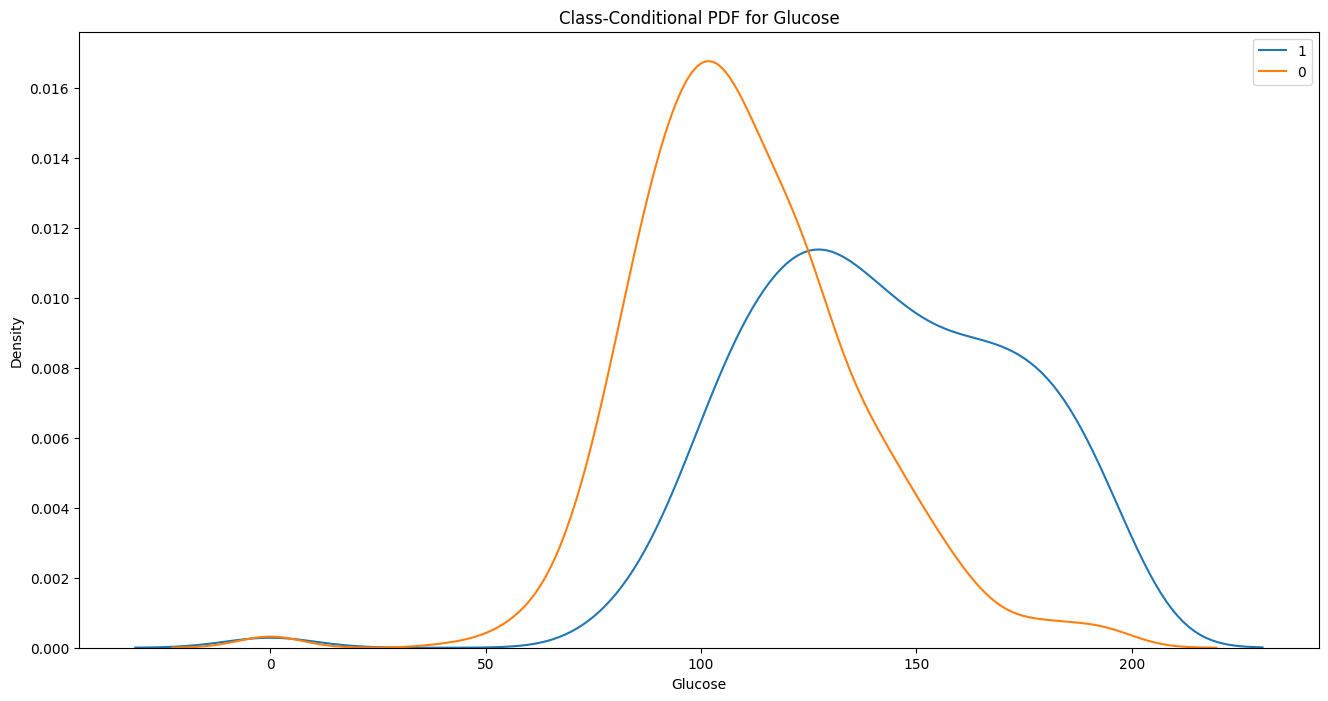

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm



# Create a sample DataFrame (replace this with your actual DataFrame)
df1 = df[['Glucose','Outcome']]

class_values = df1['Outcome'].unique() #Extracting the different class values

class_data = {}
for class_value in class_values: #Separating the dataset into subsets based on class
    class_data[class_value] = df1[df1['Outcome'] == class_value]

for feature_column in df1.columns[:-1]:  # Exclude the class column
    plt.figure(figsize=(16, 8))
    for class_value, data in class_data.items():
        sns.kdeplot(data[feature_column], label=class_value)
        
        
    plt.title(f'Class-Conditional PDF for Glucose')
    plt.xlabel(feature_column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

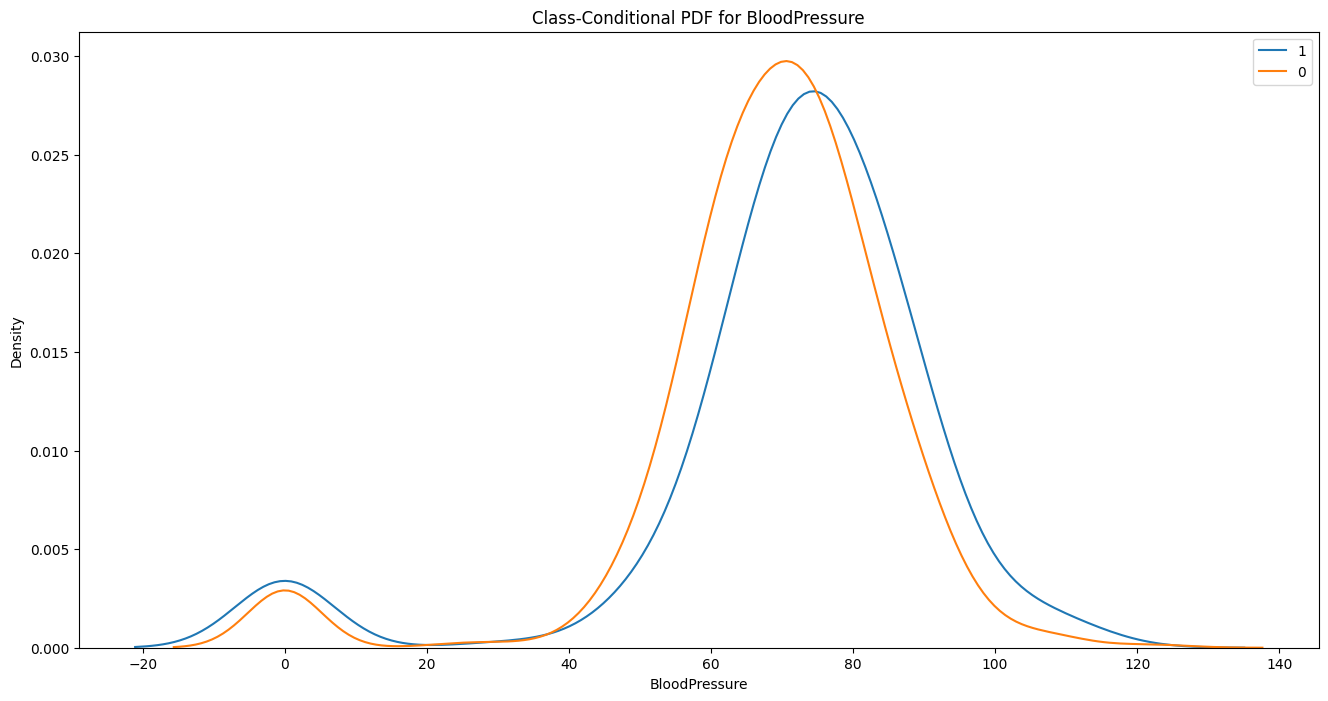

In [6]:

# Create a sample DataFrame (replace this with your actual DataFrame)
df1 = df[['BloodPressure','Outcome']]

class_values = df1['Outcome'].unique() #Extracting the different class values

class_data = {}
for class_value in class_values: #Separating the dataset into subsets based on class
    class_data[class_value] = df1[df1['Outcome'] == class_value]

for feature_column in df1.columns[:-1]:  # Exclude the class column
    plt.figure(figsize=(16, 8))
    for class_value, data in class_data.items():
        sns.kdeplot(data[feature_column], label=class_value)
        
        
    plt.title(f'Class-Conditional PDF for BloodPressure')
    plt.xlabel(feature_column)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

In [7]:
best_feature = anova_results.iloc[0]['Feature']
worst_feature = anova_results.iloc[-1]['Feature']

print(f"Best discriminative feature: {best_feature}")
print(f"Worst discriminative feature: {worst_feature}")


NameError: name 'anova_results' is not defined

## 2. 80-20 training-testing split

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

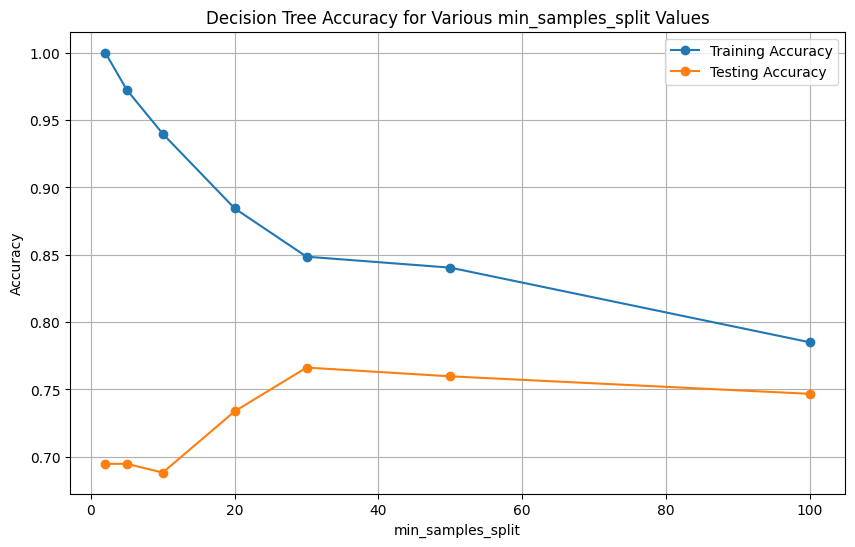

In [10]:

# Separate the features and target
X = df.drop(columns=['Outcome']) 
y = df['Outcome']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

min_samples_splits = [2, 5, 10, 20, 30, 50, 100]
train_accuracies = []
test_accuracies = []
num_runs = 10

# Stratified train-test split
# divide the dataset into 80-20 

# Train and evaluate for each value of min_samples_split
for min_samples_split in min_samples_splits:

    train_acc_sum = 0.0
    test_acc_sum = 0.0

    for _ in range(num_runs):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)
        classifier = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=1)
        classifier.fit(X_train, y_train)
        
        # Evaluate on training data
        y_train_pred = classifier.predict(X_train)
        train_accuracy = (accuracy_score(y_train, y_train_pred))
        train_acc_sum += train_accuracy

        
        # Evaluate on test data
        y_test_pred = classifier.predict(X_test)
        test_accuracy = (accuracy_score(y_test, y_test_pred))
        test_acc_sum += test_accuracy

    train_avg_accuracy = train_acc_sum / num_runs #Accuracy average of the 10 different runs
    test_avg_accuracy = test_acc_sum / num_runs
    
    train_accuracies.append(train_avg_accuracy)
    test_accuracies.append(test_avg_accuracy)    
    
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_splits, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(min_samples_splits, test_accuracies, label='Testing Accuracy', marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy for Various min_samples_split Values')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

## 3. Data Analysis

Falta escrever Sara :)

## 4. Decision Tree




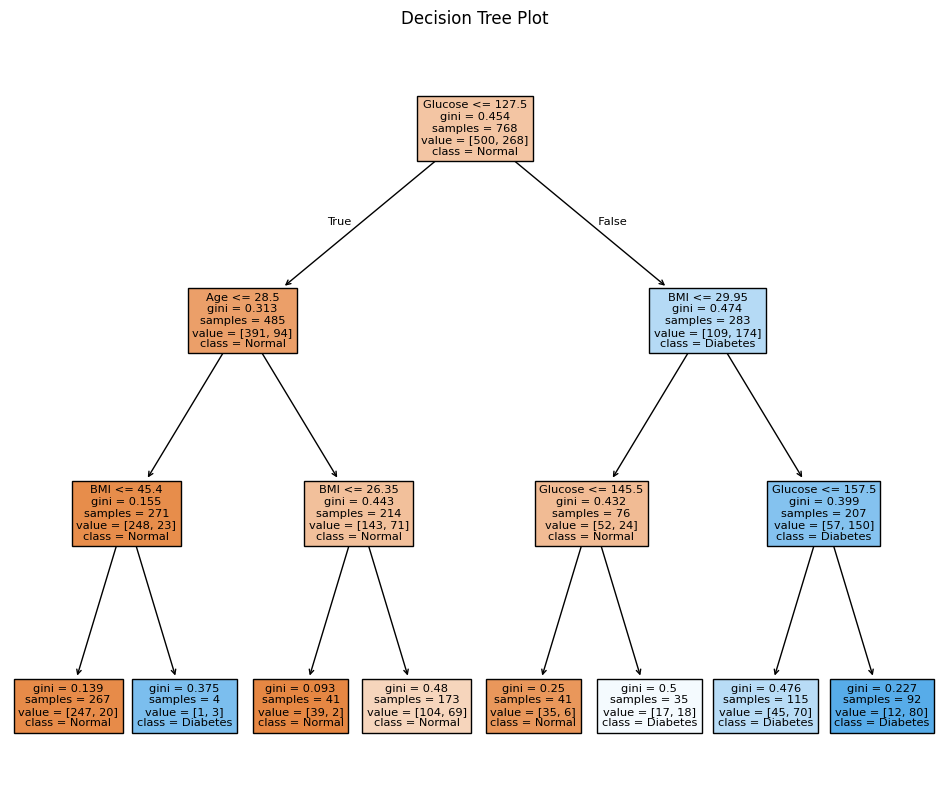

In [55]:
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y) #Encoding the classes


tree_classifier = DecisionTreeClassifier(random_state=1, max_depth=3)

# Fit the decision tree to all available data
tree_classifier.fit(X, y_encoded)

# Plot the decision tree
plt.figure(figsize=(12, 10))
plot_tree(tree_classifier, feature_names = X.columns.tolist(),filled=True, class_names= ['Normal','Diabetes'])
# dont switch class names order because it need to be ascending 
plt.title('Decision Tree Plot')
plt.show()

In [56]:
#Studying feature importance
feature_importance = dict(zip(X.columns, tree_classifier.feature_importances_))

# Sort the features by importance in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)
# Print the features associated with hernia by order of importance
top_hernia_associated_features = [feature for feature, importance in sorted_features if importance > 0] #Importance has to be bigger than 0 otherwise it is not hernia-conditional
print("Top features associated with Diabetes:")
for feature in top_hernia_associated_features:
    print(feature)

Top features associated with Diabetes:
Glucose
BMI
Age


In [59]:
# Predict probabilities
proba = tree_classifier.predict_proba(X)

# Display probabilities for the first 5 samples
print("Posterior probabilities for the first 5 samples:")
for i, (prob_diabetes, prob_normal) in enumerate(proba[:5]):
    print(f"Sample {i+1}: Diabetes = {prob_diabetes:.4f}, Normal = {prob_normal:.4f}")

Posterior probabilities for the first 5 samples:
Sample 1: Diabetes = 0.3913, Normal = 0.6087
Sample 2: Diabetes = 0.6012, Normal = 0.3988
Sample 3: Diabetes = 0.4857, Normal = 0.5143
Sample 4: Diabetes = 0.9251, Normal = 0.0749
Sample 5: Diabetes = 0.3913, Normal = 0.6087


## FALTA VER MELHOR A ULTIMA 
